In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import data_processing
import math
import ipympl
from scipy import stats
from numpy import NaN
from matplotlib.pyplot import box
from sklearn.linear_model import LinearRegression


In [66]:
NUM_SAMPLES_BUFFER = 600
FILTER_AFTER_N = 200
BP_LOW_CUTOFF = 20
BP_HIGH_CUTOFF = 500
ORDER = 2
LP_HIGH_CUTOFF = 5

Mvc = 234.7768905
percent_mvc = 0.2
mvc_threshold = percent_mvc*Mvc

In [3]:
%matplotlib widget

In [7]:
data1_haptics = np.loadtxt("Jordyn/raw_data_20220818-141436")
data2_haptics = np.loadtxt("Jordyn/raw_data_20220818-142257")
data3_haptics = np.loadtxt("Jordyn/raw_data_20220818-142914")
data4_haptics = np.loadtxt("Jordyn/raw_data_20220818-143436")
data5_haptics = np.loadtxt("Jordyn/raw_data_20220818-144326")
data6_haptics = np.loadtxt("Jordyn/raw_data_20220818-144832")
data7_haptics = np.loadtxt("Jordyn/raw_data_20220818-150044")
data8_haptics = np.loadtxt("Jordyn/raw_data_20220818-151138")
data9_haptics = np.loadtxt("Jordyn/raw_data_20220818-151804")

data_timestamps1_haptics = np.loadtxt("Jordyn/timestamp_data_20220818-141436")
data_timestamps2_haptics = np.loadtxt("Jordyn/timestamp_data_20220818-142257")
data_timestamps3_haptics = np.loadtxt("Jordyn/timestamp_data_20220818-142914")
data_timestamps4_haptics = np.loadtxt("Jordyn/timestamp_data_20220818-143436")
data_timestamps5_haptics = np.loadtxt("Jordyn/timestamp_data_20220818-144326")
data_timestamps6_haptics = np.loadtxt("Jordyn/timestamp_data_20220818-144832")
data_timestamps7_haptics = np.loadtxt("Jordyn/timestamp_data_20220818-150044")
data_timestamps8_haptics = np.loadtxt("Jordyn/timestamp_data_20220818-151138")
data_timestamps9_haptics = np.loadtxt("Jordyn/timestamp_data_20220818-151804")

data_crossed1_haptics = np.loadtxt("Jordyn/timestamp_crossed_data_20220818-141436")
data_crossed2_haptics = np.loadtxt("Jordyn/timestamp_crossed_data_20220818-142257")
data_crossed3_haptics = np.loadtxt("Jordyn/timestamp_crossed_data_20220818-142914")
data_crossed4_haptics = np.loadtxt("Jordyn/timestamp_crossed_data_20220818-143436")
data_crossed5_haptics = np.loadtxt("Jordyn/timestamp_crossed_data_20220818-144326")
data_crossed6_haptics = np.loadtxt("Jordyn/timestamp_crossed_data_20220818-144832")
data_crossed7_haptics = np.loadtxt("Jordyn/timestamp_crossed_data_20220818-150044")
data_crossed8_haptics = np.loadtxt("Jordyn/timestamp_crossed_data_20220818-151138")
data_crossed9_haptics = np.loadtxt("Jordyn/timestamp_crossed_data_20220818-151804")

gui_data1_haptics = np.load("Jordyn/combo_info_20220818-141432.npz")
gui_data2_haptics = np.load("Jordyn/combo_info_20220818-142253.npz")
gui_data3_haptics = np.load("Jordyn/combo_info_20220818-142910.npz")
gui_data4_haptics = np.load("Jordyn/combo_info_20220818-143358.npz")
gui_data5_haptics = np.load("Jordyn/combo_info_20220818-144320.npz")
gui_data6_haptics = np.load("Jordyn/combo_info_20220818-144737.npz")
gui_data7_haptics = np.load("Jordyn/combo_info_20220818-150038.npz")
gui_data8_haptics = np.load("Jordyn/combo_info_20220818-151131.npz")
gui_data9_haptics = np.load("Jordyn/combo_info_20220818-151759.npz")


In [8]:
data1_wo = np.loadtxt("Jordyn/raw_data_20220818-141719")
data2_wo = np.loadtxt("Jordyn/raw_data_20220818-142012")
data3_wo = np.loadtxt("Jordyn/raw_data_20220818-142605")
data4_wo = np.loadtxt("Jordyn/raw_data_20220818-143739")
data5_wo = np.loadtxt("Jordyn/raw_data_20220818-144032")
data6_wo = np.loadtxt("Jordyn/raw_data_20220818-145256")
data7_wo = np.loadtxt("Jordyn/raw_data_20220818-150420")
data8_wo = np.loadtxt("Jordyn/raw_data_20220818-150745")
data9_wo = np.loadtxt("Jordyn/raw_data_20220818-151500")

data_timestamps1_wo = np.loadtxt("Jordyn/timestamp_data_20220818-141719")
data_timestamps2_wo = np.loadtxt("Jordyn/timestamp_data_20220818-142012")
data_timestamps3_wo = np.loadtxt("Jordyn/timestamp_data_20220818-142605")
data_timestamps4_wo = np.loadtxt("Jordyn/timestamp_data_20220818-143739")
data_timestamps5_wo = np.loadtxt("Jordyn/timestamp_data_20220818-144032")
data_timestamps6_wo = np.loadtxt("Jordyn/timestamp_data_20220818-145256")
data_timestamps7_wo = np.loadtxt("Jordyn/timestamp_data_20220818-150420")
data_timestamps8_wo = np.loadtxt("Jordyn/timestamp_data_20220818-150745")
data_timestamps9_wo = np.loadtxt("Jordyn/timestamp_data_20220818-151500")

data_crossed1_wo = np.loadtxt("Jordyn/timestamp_crossed_data_20220818-141719")
data_crossed2_wo = np.loadtxt("Jordyn/timestamp_crossed_data_20220818-142012")
data_crossed3_wo = np.loadtxt("Jordyn/timestamp_crossed_data_20220818-142605")
data_crossed4_wo = np.loadtxt("Jordyn/timestamp_crossed_data_20220818-143739")
data_crossed5_wo = np.loadtxt("Jordyn/timestamp_crossed_data_20220818-144032")
data_crossed6_wo = np.loadtxt("Jordyn/timestamp_crossed_data_20220818-145256")
data_crossed7_wo = np.loadtxt("Jordyn/timestamp_crossed_data_20220818-150420")
data_crossed8_wo = np.loadtxt("Jordyn/timestamp_crossed_data_20220818-150745")
data_crossed9_wo = np.loadtxt("Jordyn/timestamp_crossed_data_20220818-151500")

gui_data1_wo = np.load("Jordyn/combo_info_20220818-141714.npz")
gui_data2_wo = np.load("Jordyn/combo_info_20220818-142007.npz")
gui_data3_wo = np.load("Jordyn/combo_info_20220818-142601.npz")
gui_data4_wo = np.load("Jordyn/combo_info_20220818-143733.npz")
gui_data5_wo = np.load("Jordyn/combo_info_20220818-144026.npz")
gui_data6_wo = np.load("Jordyn/combo_info_20220818-145251.npz")
gui_data7_wo = np.load("Jordyn/combo_info_20220818-150414.npz")
gui_data8_wo = np.load("Jordyn/combo_info_20220818-150741.npz")
gui_data9_wo = np.load("Jordyn/combo_info_20220818-151454.npz")

In [96]:
gui_combos_haptics = np.concatenate((gui_data1_haptics['combos'], gui_data2_haptics['combos'], gui_data3_haptics['combos'], gui_data4_haptics['combos'], gui_data5_haptics['combos'], gui_data6_haptics['combos'], gui_data7_haptics['combos'], gui_data8_haptics['combos'], gui_data9_haptics['combos']), axis=0)
gui_reps_haptics = gui_data1_haptics['reps']

print("repitions:", gui_reps_haptics)
print('Wt/Dt combos:', gui_combos_haptics)
np.savetxt('jordyn_gui_combos_haptics.txt', gui_combos_haptics)

ID_haptics = np.log2(gui_combos_haptics[:,1]/gui_combos_haptics[:,0])
print("ID:",ID_haptics)

repitions: 25
Wt/Dt combos: [[  60 2200]
 [  60 1000]
 [  60 1600]
 [ 230 2200]
 [ 230 1600]
 [ 230 1000]
 [ 150 1000]
 [ 150 2200]
 [ 150 1600]
 [ 230 1600]
 [ 230 2200]
 [ 230 1000]
 [  60 2200]
 [  60 1600]
 [  60 1000]
 [  60 1000]
 [  60 2200]
 [  60 1600]
 [ 150 1600]
 [ 150 2200]
 [ 150 1000]
 [  60 1000]
 [  60 1600]
 [  60 2200]
 [ 230 1000]
 [ 230 2200]
 [ 230 1600]]
ID: [5.19639721 4.05889369 4.73696559 3.25779776 2.79836614 2.12029423
 2.73696559 3.87446912 3.4150375  2.79836614 3.25779776 2.12029423
 5.19639721 4.73696559 4.05889369 4.05889369 5.19639721 4.73696559
 3.4150375  3.87446912 2.73696559 4.05889369 4.73696559 5.19639721
 2.12029423 3.25779776 2.79836614]


In [95]:
gui_combos_wo = np.concatenate((gui_data1_wo['combos'], gui_data2_wo['combos'], gui_data3_wo['combos'],gui_data4_wo['combos'], gui_data5_wo['combos'], gui_data6_wo['combos'],gui_data7_wo['combos'], gui_data8_wo['combos'], gui_data9_wo['combos']), axis=0)
gui_reps_wo = gui_data1_wo['reps']

print("repitions:", gui_reps_wo)
print('Wt/Dt combos:', gui_combos_wo)
np.savetxt('jordyn_gui_combos_wo.txt', gui_combos_wo)

ID_wo = np.log2(gui_combos_wo[:,1]/gui_combos_wo[:,0])
print("ID:",ID_wo)

repitions: 25
Wt/Dt combos: [[  60 2200]
 [  60 1600]
 [  60 1000]
 [ 230 1600]
 [ 230 2200]
 [ 230 1000]
 [ 150 2200]
 [ 150 1600]
 [ 150 1000]
 [ 230 1000]
 [ 230 1600]
 [ 230 2200]
 [  60 1000]
 [  60 1600]
 [  60 2200]
 [  60 1000]
 [  60 2200]
 [  60 1600]
 [ 150 1000]
 [ 150 2200]
 [ 150 1600]
 [  60 1600]
 [  60 2200]
 [  60 1000]
 [ 230 1000]
 [ 230 2200]
 [ 230 1600]]
ID: [5.19639721 4.73696559 4.05889369 2.79836614 3.25779776 2.12029423
 3.87446912 3.4150375  2.73696559 2.12029423 2.79836614 3.25779776
 4.05889369 4.73696559 5.19639721 4.05889369 5.19639721 4.73696559
 2.73696559 3.87446912 3.4150375  4.73696559 5.19639721 4.05889369
 2.12029423 3.25779776 2.79836614]


In [11]:
def remove_trailing_zeros(data, data_timestamps, data_crossed):
    data_new = data[~(data == 0).all(axis=1)]
    timestamp_data_new = data_timestamps[~(data == 0).all(axis=1)]
    data_crossed_new = data_crossed[~(data_crossed == 0)]
    return data_new, timestamp_data_new, data_crossed_new

def zero_runs(a):
    if a[-1] == 0:
        a = np.append(a, 1)
    if a[0] == 0:
        a = np.append(1, a)
    iszero = np.equal(a, 0).view(np.int8)
    absdiff = np.abs(np.diff(iszero))
    # Runs start and end where absdiff is 1.
    ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
    return ranges

# remove the power cycling
def remove_long_runs(runs, data):
    runs_lengths = runs[:,1] - runs[:,0]

    for idx, length in enumerate(runs_lengths):
        if length > 2000:
            data[runs[idx,0]-1:runs[idx,1]+1] = 1 

    return data 

In [9]:

# a = np.append(data5_haptics[:, 4], 1)
# iszero = np.equal(a, 0).view(np.int8)
# print(a)
# print(iszero)
# absdiff = np.abs(np.diff(iszero))
# print(np.where(absdiff == 1)[0])
# # Runs start and end where absdiff is 1.
# ranges = np.where(absdiff == 1)[0].reshape(-1, 2)

In [38]:
data_timestamps9_wo

array([-190952.26934408, -190952.26909408, -190952.26884408, ...,
       -190821.17122367, -190821.17097367, -190821.17072367])

In [29]:
np.argwhere(data_timestamps3_wo < -190000)

array([[524168]], dtype=int64)

In [22]:
np.argwhere(data_timestamps5_haptics < -190000)

array([[520800],
       [520801],
       [520802],
       ...,
       [999997],
       [999998],
       [999999]], dtype=int64)

In [23]:
data1_haptics, data_timestamps1_haptics, data_crossed1_haptics  = remove_trailing_zeros(data1_haptics, data_timestamps1_haptics, data_crossed1_haptics)
data2_haptics, data_timestamps2_haptics, data_crossed2_haptics  = remove_trailing_zeros(data2_haptics, data_timestamps2_haptics, data_crossed2_haptics)
data3_haptics, data_timestamps3_haptics, data_crossed3_haptics  = remove_trailing_zeros(data3_haptics, data_timestamps3_haptics, data_crossed3_haptics)
data4_haptics, data_timestamps4_haptics, data_crossed4_haptics  = remove_trailing_zeros(data4_haptics, data_timestamps4_haptics, data_crossed4_haptics)
data5_haptics, data_timestamps5_haptics, data_crossed5_haptics  = remove_trailing_zeros(data5_haptics, data_timestamps5_haptics, data_crossed5_haptics)
data6_haptics, data_timestamps6_haptics, data_crossed6_haptics  = remove_trailing_zeros(data6_haptics, data_timestamps6_haptics, data_crossed6_haptics)
data7_haptics, data_timestamps7_haptics, data_crossed7_haptics  = remove_trailing_zeros(data7_haptics, data_timestamps7_haptics, data_crossed7_haptics)
data8_haptics, data_timestamps8_haptics, data_crossed8_haptics  = remove_trailing_zeros(data8_haptics, data_timestamps8_haptics, data_crossed8_haptics)
data9_haptics, data_timestamps9_haptics, data_crossed9_haptics  = remove_trailing_zeros(data9_haptics, data_timestamps9_haptics, data_crossed9_haptics)

# data_timestamps2_haptics = data_timestamps2_haptics[:-2]
# data2_haptics = data2_haptics[:-2]

data_timestamps5_haptics = data_timestamps5_haptics[:520799]
data5_haptics = data5_haptics[:520799]

# data_timestamps9_haptics = data_timestamps9_haptics[:535200]
# data9_haptics = data9_haptics[:535200]

data_crossed1_haptics = data_crossed1_haptics - data_timestamps1_haptics[0]
data_timestamps1_haptics = data_timestamps1_haptics - data_timestamps1_haptics[0]

data_crossed2_haptics = data_crossed2_haptics - data_timestamps2_haptics[0] + data_timestamps1_haptics[-1]
data_timestamps2_haptics = data_timestamps2_haptics - data_timestamps2_haptics[0] + data_timestamps1_haptics[-1]


data_crossed3_haptics = data_crossed3_haptics - data_timestamps3_haptics[0] + data_timestamps2_haptics[-1]
data_timestamps3_haptics = data_timestamps3_haptics - data_timestamps3_haptics[0] + data_timestamps2_haptics[-1]

data_crossed4_haptics = data_crossed4_haptics - data_timestamps4_haptics[0] + data_timestamps3_haptics[-1]
data_timestamps4_haptics = data_timestamps4_haptics - data_timestamps4_haptics[0] + data_timestamps3_haptics[-1]

data_crossed5_haptics = data_crossed5_haptics - data_timestamps5_haptics[0] + data_timestamps4_haptics[-1]
data_timestamps5_haptics = data_timestamps5_haptics - data_timestamps5_haptics[0] + data_timestamps4_haptics[-1]

data_crossed6_haptics = data_crossed6_haptics - data_timestamps6_haptics[0] + data_timestamps5_haptics[-1]
data_timestamps6_haptics = data_timestamps6_haptics - data_timestamps6_haptics[0] + data_timestamps5_haptics[-1]

data_crossed7_haptics = data_crossed7_haptics - data_timestamps7_haptics[0] + data_timestamps6_haptics[-1]
data_timestamps7_haptics = data_timestamps7_haptics - data_timestamps7_haptics[0] + data_timestamps6_haptics[-1]

data_crossed8_haptics = data_crossed8_haptics - data_timestamps8_haptics[0] + data_timestamps7_haptics[-1]
data_timestamps8_haptics = data_timestamps8_haptics - data_timestamps8_haptics[0] + data_timestamps7_haptics[-1]

data_crossed9_haptics = data_crossed9_haptics - data_timestamps9_haptics[0] + data_timestamps8_haptics[-1]
data_timestamps9_haptics = data_timestamps9_haptics - data_timestamps9_haptics[0] + data_timestamps8_haptics[-1]



data1_haptics[:, 4] = remove_long_runs(zero_runs(data1_haptics[:, 4]), data1_haptics[:, 4])
data2_haptics[:, 4] = remove_long_runs(zero_runs(data2_haptics[:, 4]), data2_haptics[:, 4])
data3_haptics[:, 4] = remove_long_runs(zero_runs(data3_haptics[:, 4]), data3_haptics[:, 4])
data4_haptics[:, 4] = remove_long_runs(zero_runs(data4_haptics[:, 4]), data4_haptics[:, 4])
data5_haptics[:, 4] = remove_long_runs(zero_runs(data5_haptics[:, 4]), data5_haptics[:, 4])
data6_haptics[:, 4] = remove_long_runs(zero_runs(data6_haptics[:, 4]), data6_haptics[:, 4])
data7_haptics[:, 4] = remove_long_runs(zero_runs(data7_haptics[:, 4]), data7_haptics[:, 4])
data8_haptics[:, 4] = remove_long_runs(zero_runs(data8_haptics[:, 4]), data8_haptics[:, 4])
data9_haptics[:, 4] = remove_long_runs(zero_runs(data9_haptics[:, 4]), data9_haptics[:, 4])

data_crossed_haptics = np.concatenate((data_crossed1_haptics, data_crossed2_haptics, data_crossed3_haptics,data_crossed4_haptics, data_crossed5_haptics, data_crossed6_haptics,data_crossed7_haptics, data_crossed8_haptics, data_crossed9_haptics), axis = 0)
data_timestamps_haptics = np.concatenate((data_timestamps1_haptics, data_timestamps2_haptics, data_timestamps3_haptics,data_timestamps4_haptics, data_timestamps5_haptics, data_timestamps6_haptics, data_timestamps7_haptics, data_timestamps8_haptics, data_timestamps9_haptics), axis=0)
data_haptics = np.concatenate((data1_haptics, data2_haptics, data3_haptics, data4_haptics, data5_haptics, data6_haptics, data7_haptics, data8_haptics, data9_haptics), axis=0)

In [39]:
data1_wo, data_timestamps1_wo, data_crossed1_wo  = remove_trailing_zeros(data1_wo, data_timestamps1_wo, data_crossed1_wo)
data2_wo, data_timestamps2_wo, data_crossed2_wo  = remove_trailing_zeros(data2_wo, data_timestamps2_wo, data_crossed2_wo)
data3_wo, data_timestamps3_wo, data_crossed3_wo  = remove_trailing_zeros(data3_wo, data_timestamps3_wo, data_crossed3_wo)
data4_wo, data_timestamps4_wo, data_crossed4_wo  = remove_trailing_zeros(data4_wo, data_timestamps4_wo, data_crossed4_wo)
data5_wo, data_timestamps5_wo, data_crossed5_wo  = remove_trailing_zeros(data5_wo, data_timestamps5_wo, data_crossed5_wo)
data6_wo, data_timestamps6_wo, data_crossed6_wo  = remove_trailing_zeros(data6_wo, data_timestamps6_wo, data_crossed6_wo)
data7_wo, data_timestamps7_wo, data_crossed7_wo  = remove_trailing_zeros(data7_wo, data_timestamps7_wo, data_crossed7_wo)
data8_wo, data_timestamps8_wo, data_crossed8_wo  = remove_trailing_zeros(data8_wo, data_timestamps8_wo, data_crossed8_wo)
data9_wo, data_timestamps9_wo, data_crossed9_wo  = remove_trailing_zeros(data9_wo, data_timestamps9_wo, data_crossed9_wo)


data_timestamps3_wo = data_timestamps3_wo[:524167]
data3_wo = data3_wo[:524167]

data_crossed1_wo = data_crossed1_wo - data_timestamps1_wo[0]
data_timestamps1_wo = data_timestamps1_wo - data_timestamps1_wo[0]

data_crossed2_wo = data_crossed2_wo - data_timestamps2_wo[0] + data_timestamps1_wo[-1]
data_timestamps2_wo = data_timestamps2_wo - data_timestamps2_wo[0] + data_timestamps1_wo[-1]

data_crossed3_wo = data_crossed3_wo - data_timestamps3_wo[0] + data_timestamps2_wo[-1]
data_timestamps3_wo = data_timestamps3_wo - data_timestamps3_wo[0] + data_timestamps2_wo[-1]

data_crossed4_wo = data_crossed4_wo - data_timestamps4_wo[0] + data_timestamps3_wo[-1]
data_timestamps4_wo = data_timestamps4_wo - data_timestamps4_wo[0] + data_timestamps3_wo[-1]

data_crossed5_wo = data_crossed5_wo - data_timestamps5_wo[0] + data_timestamps4_wo[-1]
data_timestamps5_wo = data_timestamps5_wo - data_timestamps5_wo[0] + data_timestamps4_wo[-1]

data_crossed6_wo = data_crossed6_wo - data_timestamps6_wo[0] + data_timestamps5_wo[-1]
data_timestamps6_wo = data_timestamps6_wo - data_timestamps6_wo[0] + data_timestamps5_wo[-1]

data_crossed7_wo = data_crossed7_wo - data_timestamps7_wo[0] + data_timestamps6_wo[-1]
data_timestamps7_wo = data_timestamps7_wo - data_timestamps7_wo[0] + data_timestamps6_wo[-1]

data_crossed8_wo = data_crossed8_wo - data_timestamps8_wo[0] + data_timestamps7_wo[-1]
data_timestamps8_wo = data_timestamps8_wo - data_timestamps8_wo[0] + data_timestamps7_wo[-1]

data_crossed9_wo = data_crossed9_wo - data_timestamps9_wo[0] + data_timestamps8_wo[-1]
data_timestamps9_wo = data_timestamps9_wo - data_timestamps9_wo[0] + data_timestamps8_wo[-1]

data1_wo[:, 4] = remove_long_runs(zero_runs(data1_wo[:, 4]), data1_wo[:, 4])
data2_wo[:, 4] = remove_long_runs(zero_runs(data2_wo[:, 4]), data2_wo[:, 4])
data3_wo[:, 4] = remove_long_runs(zero_runs(data3_wo[:, 4]), data3_wo[:, 4])
data4_wo[:, 4] = remove_long_runs(zero_runs(data4_wo[:, 4]), data4_wo[:, 4])
data5_wo[:, 4] = remove_long_runs(zero_runs(data5_wo[:, 4]), data5_wo[:, 4])
data6_wo[:, 4] = remove_long_runs(zero_runs(data6_wo[:, 4]), data6_wo[:, 4])
data7_wo[:, 4] = remove_long_runs(zero_runs(data7_wo[:, 4]), data7_wo[:, 4])
data8_wo[:, 4] = remove_long_runs(zero_runs(data8_wo[:, 4]), data8_wo[:, 4])
data9_wo[:, 4] = remove_long_runs(zero_runs(data9_wo[:, 4]), data9_wo[:, 4])

data_crossed_wo = np.concatenate((data_crossed1_wo, data_crossed2_wo, data_crossed3_wo, data_crossed4_wo, data_crossed5_wo, data_crossed6_wo, data_crossed7_wo, data_crossed8_wo, data_crossed9_wo), axis = 0)
data_timestamps_wo = np.concatenate((data_timestamps1_wo, data_timestamps2_wo, data_timestamps3_wo, data_timestamps4_wo, data_timestamps5_wo, data_timestamps6_wo, data_timestamps7_wo, data_timestamps8_wo, data_timestamps9_wo), axis=0)
data_wo = np.concatenate((data1_wo, data2_wo, data3_wo, data4_wo, data5_wo, data6_wo, data7_wo, data8_wo, data9_wo), axis=0)

Text(0.5, 1.0, 'EMG - Haptics ')

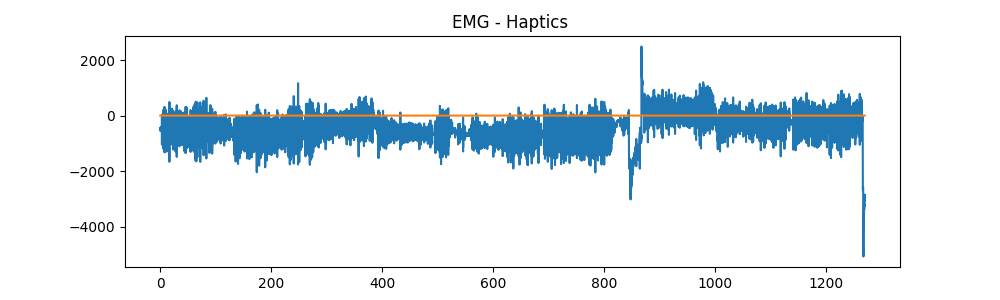

In [24]:
fig, axs = plt.subplots(1, figsize=(10, 3), sharex=True) # dont need status or lsl clock
# fig.suptitle('Data Flow')

plt.plot(data_timestamps_haptics, data_haptics[:, 0])
plt.plot(data_timestamps_haptics, data_haptics[:, 4])
plt.title('EMG - Haptics ')

Text(0.5, 1.0, 'EMG - None')

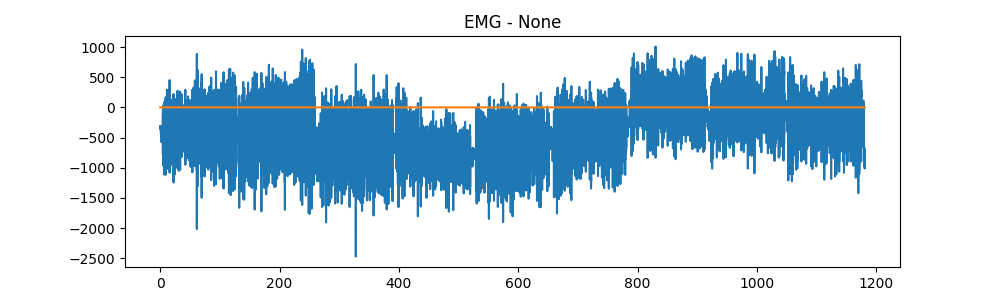

In [40]:
fig, axs = plt.subplots(1, figsize=(10, 3), sharex=True) # dont need status or lsl clock
# fig.suptitle('Data Flow')

plt.plot(data_timestamps_wo, data_wo[:, 0])
plt.plot(data_timestamps_wo, data_wo[:, 4])
plt.title('EMG - None')

In [41]:
process_haptics = data_processing.postProcessData(4000, data_haptics[:,0])
process_haptics.processAll(BP_LOW_CUTOFF, BP_HIGH_CUTOFF, LP_HIGH_CUTOFF, ORDER, FILTER_AFTER_N)

process_wo = data_processing.postProcessData(4000, data_wo[:,0])
process_wo.processAll(BP_LOW_CUTOFF, BP_HIGH_CUTOFF, LP_HIGH_CUTOFF, ORDER, FILTER_AFTER_N)

In [42]:
def findThresholdCrossing(lpData, threshold):
    threshold_crossings = np.diff(lpData > threshold, prepend=False)
    positive_difference = np.diff(lpData, prepend=0) >= 0 
    threshold_crossings_positive = np.argwhere(np.logical_and(threshold_crossings, positive_difference))[:,0]
    return threshold_crossings_positive

def thresholdCrossed(lpData, threshold):
    threshold_crossings = np.diff(lpData > threshold)
    print("function crossing", threshold_crossings)
    positive_difference = np.diff(lpData) > 0    
    print("funciton difference", positive_difference) 
    thresholdCrossed =  np.any(np.logical_and(threshold_crossings, positive_difference))
    return thresholdCrossed

In [88]:


threshold_crossings_up_haptics = findThresholdCrossing(process_haptics.lpFilteredData, mvc_threshold)
threshold_crossings_up_wo = findThresholdCrossing(process_wo.lpFilteredData, mvc_threshold)

# Haptics 
stop_cue_haptics = (np.where(np.diff(data_haptics[:, 4]) == 1)[0])
start_cue_haptics = (np.where(np.diff(data_haptics[:, 4]) == -1)[0])
print(np.shape(start_cue_haptics))

if stop_cue_haptics[0] < start_cue_haptics[0]:
    stop_cue_haptics = stop_cue_haptics[1:]

# NOne
stop_cue_wo = (np.where(np.diff(data_wo[:, 4]) == 1)[0])
start_cue_wo = (np.where(np.diff(data_wo[:, 4]) == -1)[0])

if stop_cue_wo[0] < start_cue_wo[0]:
    stop_cue_wo = stop_cue_wo[1:]

print("threshold corssing:", threshold_crossings_up_haptics)
print("start:", start_cue_haptics)
print("stop:", stop_cue_haptics)

(675,)
threshold corssing: [  12052   21591   30446   38719   48014   57243   65732   74459   83690
   92088   94896  101147  109857  118345  127485  138127  146887  155422
  156075  164786  173960  182632  191230  200049  208739  217881  226731
  236024  240341  243966  248105  252507  255616  256236  259923  263989
  267481  271990  276219  280249  284448  288389  291986  296073  300018
  304351  308015  311974  316636  319748  323752  327894  332043  341097
  341969  348412  354846  361063  367297  373550  377408  382899  390203
  396578  402729  409254  421578  428469  435059  441572  447833  454300
  460357  467127  473104  479459  486601  492505  499020  533706  543392
  551869  560497  563433  565983  572116  580622  589678  598208  607579
  616169  624793  633818  642556  651453  660028  668664  677860  686854
  695684  704251  712800  721965  730604  738691  742494  747751  755648
  756497  762842  769149  775763  782165  788396  795199  801526  807677
  811628  817195  823825

In [89]:
print(np.shape(start_cue_haptics))

(675,)


In [44]:
stop_cue_timestamp_haptics = data_timestamps_haptics[np.where(np.diff(data_haptics[:, 4]) == 1)[0]]
# print(stop_cue_timestamp_haptics)

start_cue_timestamp_haptics = data_timestamps_haptics[np.where(np.diff(data_haptics[:, 4]) == -1)[0]]
# print(start_cue_timestamp_haptics)

data_crossed_small_haptics = data_crossed_haptics[data_crossed_haptics<np.max(data_timestamps_haptics)]
data_crossed_small_haptics = data_crossed_small_haptics[data_crossed_small_haptics>0]
# print(data_crossed_small_haptics)


stop_cue_timestamp_wo = data_timestamps_wo[np.where(np.diff(data_wo[:, 4]) == 1)[0]]
# print(stop_cue_timestampwo)

start_cue_timestamp_wo = data_timestamps_wo[np.where(np.diff(data_wo[:, 4]) == -1)[0]]
# print(start_cue_timestampwo)

data_crossed_small_wo = data_crossed_wo[data_crossed_wo<np.max(data_timestamps_wo)]
data_crossed_small_wo = data_crossed_small_wo[data_crossed_small_wo>0]

In [45]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc='upper right') #,bbox_to_anchor=(0.96,1)

def set_normalized_twin_axis(axis, mvc):
    ax_twin = axis.twinx()
    ax_twin.set_ylabel('Normalized')

    # set twin scale (convert degree celsius to fahrenheit)
    Norm_amp = lambda amp: amp/mvc
    # get left axis limits
    ymin, ymax = axis.get_ylim()
    # apply function and set transformed values to right axis limits
    ax_twin.set_ylim((Norm_amp(ymin),Norm_amp(ymax)))
    # set an invisible artist to twin axes 
    # to prevent falling back to initial values on rescale events

    axis.spines['top'].set_visible(False)
    ax_twin.spines['top'].set_visible(False)
    ax_twin.plot([],[])

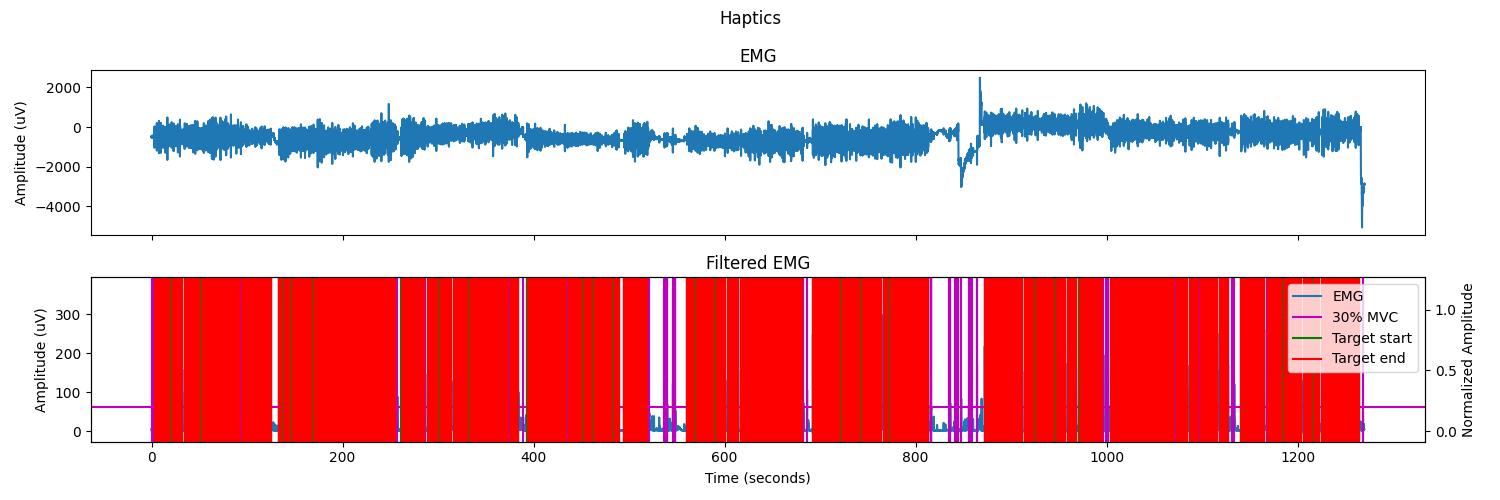

In [46]:
fig, axs = plt.subplots(2, figsize=(15, 5), sharex=True) # dont need status or lsl clock
fig.suptitle('Haptics')

axs[0].plot(data_timestamps_haptics, data_haptics[:, 0])
axs[0].title.set_text('EMG')

for xc in start_cue_timestamp_haptics:
    axs[1].axvline(x=xc, color='g')
for xc in stop_cue_timestamp_haptics:
    axs[1].axvline(x=xc, color='r')

axs[1].plot(data_timestamps_haptics, process_haptics.lpFilteredData, label='EMG')
axs[1].title.set_text('Filtered EMG')
axs[1].axhline(y=mvc_threshold, color='m', label='30% MVC')

for ups in data_crossed_small_haptics:
    axs[1].axvline(x=ups, color='m')

for xc in start_cue_timestamp_haptics:
    axs[1].axvline(x=xc, color='g', label='Target start')
for xc in stop_cue_timestamp_haptics:
    axs[1].axvline(x=xc, color='r', label='Target end')

    
axs[1].set_xlabel('Time (seconds)')
axs[1].set_ylabel('Amplitude (uV)')
axs[0].set_ylabel('Amplitude (uV)')
ax1_twin = axs[1].twinx()
ax1_twin.set_ylabel('Normalized Amplitude')

# set twin scale (convert degree celsius to fahrenheit)
Norm_amp = lambda amp: amp/Mvc
# get left axis limits
ymin, ymax = axs[1].get_ylim()
# apply function and set transformed values to right axis limits
ax1_twin.set_ylim((Norm_amp(ymin),Norm_amp(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax1_twin.plot([],[])

# plt.legend(loc="upper right", ncol=2)
legend_without_duplicate_labels(axs[1])

plt.setp(axs[0].get_xticklabels(), visible=False)
plt.tight_layout()
plt.show()

In [90]:
print(np.shape(start_cue_haptics))

(675,)


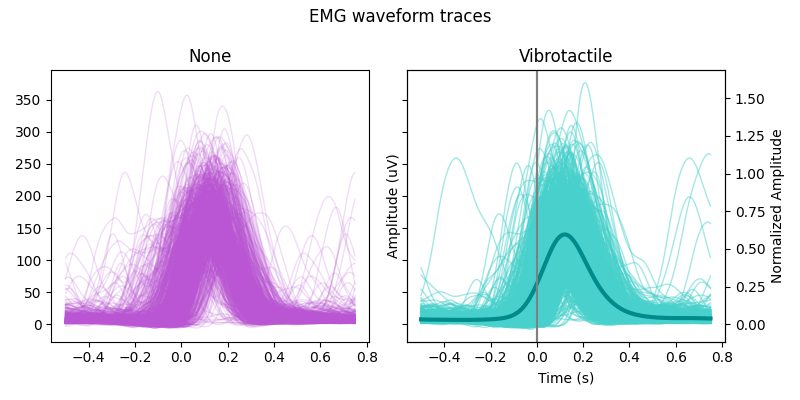

In [94]:
x_axis = (np.arange(5000) - 2000)/4000


fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
waveforms_wo = np.empty((np.shape(start_cue_wo)[0], 5000))
for idx, start in enumerate(start_cue_wo):
    waveforms_wo[idx] = process_wo.lpFilteredData[start-2000:start+3000]
    ax[0].plot(x_axis, process_wo.lpFilteredData[start-2000:start+3000], alpha=0.2, lw=1, color='mediumorchid')

np.savetxt('jordyn_waveforms_wo.txt', waveforms_wo)

# print(np.shape(np.mean(waveforms, axis=0)))
ax[0].set_title('None')
ax[1].set_ylabel('Amplitude (uV)')
ax[1].set_xlabel('Time (s)')

plt.axvline(x = 0, color='grey')



waveforms_haptics = np.empty((np.shape(start_cue_haptics)[0], 5000))
for idx, start in enumerate(start_cue_haptics):
    waveforms_haptics[idx] = process_haptics.lpFilteredData[start-2000:start+3000]
    ax[1].plot(x_axis, process_haptics.lpFilteredData[start-2000:start+3000], alpha=0.5, lw=1, color='mediumturquoise')
np.savetxt('jordyn_waveforms_haptics.txt', waveforms_haptics)

# print(np.shape(np.mean(waveforms, axis=0)))
ax[1].plot(x_axis, np.mean(waveforms_haptics, axis=0), color ='darkcyan', lw=3)
ax[1].set_title('Vibrotactile')
ax1_twin = ax[1].twinx()
ax1_twin.set_ylabel('Normalized Amplitude')

# set twin scale (convert degree celsius to fahrenheit)
Norm_amp = lambda amp: amp/Mvc
# get left axis limits
ymin, ymax = ax[1].get_ylim()
# apply function and set transformed values to right axis limits
ax1_twin.set_ylim((Norm_amp(ymin),Norm_amp(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax1_twin.plot([],[])

plt.axvline(x = 0, color='grey')
plt.suptitle('EMG waveform traces')
plt.tight_layout()

In [93]:
print(np.shape(waveforms_haptics))

(675, 5000)


In [87]:
np.shape(start_cue_timestamp_haptics)

(675,)

Text(0.5, 1.0, 'Average (+std dev) EMG waveforms')

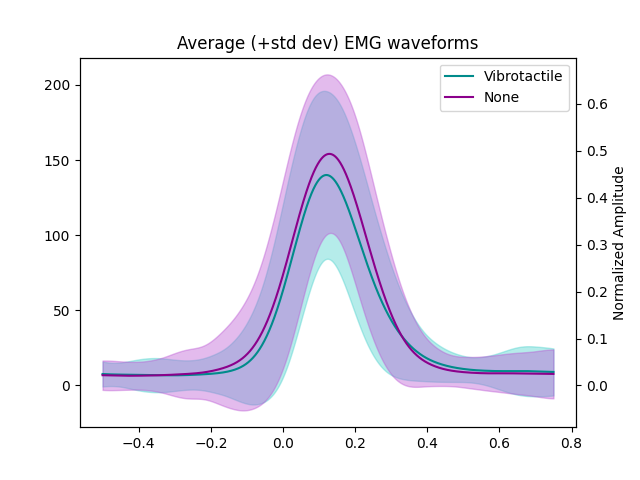

In [48]:
fig, ax = plt.subplots(1)
plt.plot(x_axis, np.mean(waveforms_haptics, axis=0), 'darkcyan', label='Vibrotactile')
plt.fill_between(x_axis, np.mean(waveforms_haptics, axis=0)-np.std(waveforms_haptics, axis=0), np.mean(waveforms_haptics, axis=0)+np.std(waveforms_haptics, axis=0), color='mediumturquoise', alpha=0.4)
plt.plot(x_axis, np.mean(waveforms_wo, axis=0), 'darkmagenta', label='None')
plt.fill_between(x_axis, np.mean(waveforms_wo, axis=0)-np.std(waveforms_wo, axis=0), np.mean(waveforms_wo, axis=0)+np.std(waveforms_wo, axis=0), color='mediumorchid', alpha=0.4)
plt.legend()

ax1_twin = ax.twinx()
ax1_twin.set_ylabel('Normalized Amplitude')

# set twin scale (convert degree celsius to fahrenheit)
Norm_amp = lambda amp: amp/Mvc
# get left axis limits
ymin, ymax = ax.get_ylim()
# apply function and set transformed values to right axis limits
ax1_twin.set_ylim((Norm_amp(ymin),Norm_amp(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax1_twin.plot([],[])
plt.title('Average (+std dev) EMG waveforms')

In [49]:

print(ID_haptics)

[5.19639721 4.05889369 4.73696559 3.25779776 2.79836614 2.12029423
 2.73696559 3.87446912 3.4150375  2.79836614 3.25779776 2.12029423
 5.19639721 4.73696559 4.05889369 4.05889369 5.19639721 4.73696559
 3.4150375  3.87446912 2.73696559 4.05889369 4.73696559 5.19639721
 2.12029423 3.25779776 2.79836614]


IndexError: index 2 is out of bounds for axis 0 with size 2

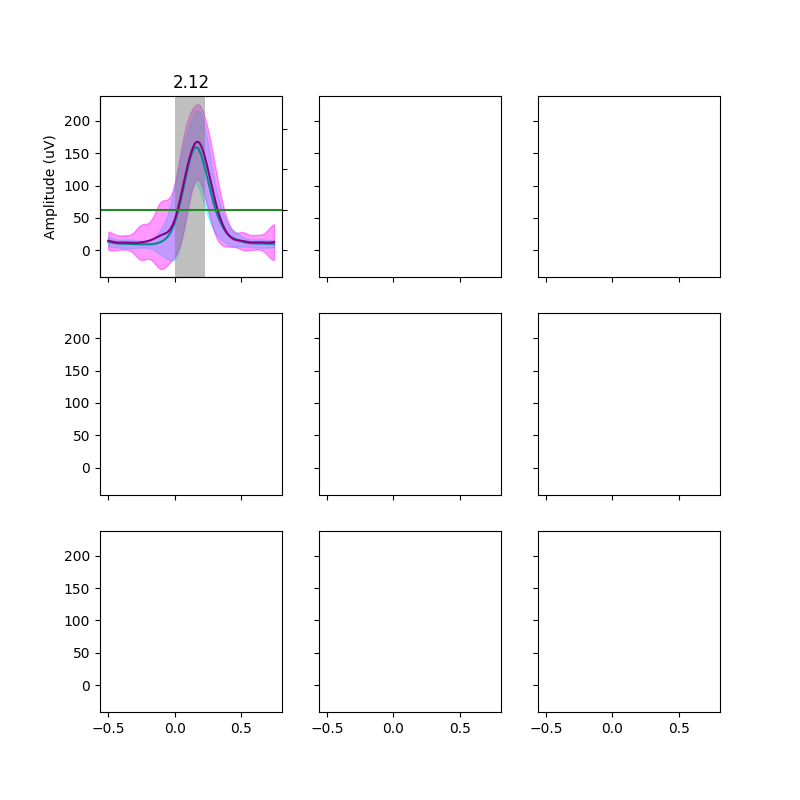

In [50]:
fig, ax = plt.subplots(3, 3, figsize=(8, 8), sharex=True, sharey=True)
ax = ax.flatten()
ID_ordered = np.sort(ID_haptics)
for idx, the_ID in enumerate(ID_ordered[::3]):

    # print(the_ID)
    idx_haptics = np.argwhere(the_ID == ID_haptics)
    target_size = gui_combos_haptics[idx_haptics[0][0],0]
    # # print(idx_haptics)
    # atmp1 = waveforms_haptics[idx_haptics[0][0]*gui_reps_haptics:(idx_haptics[0][0]+1)*gui_reps_haptics-1]
    # atmp2 = waveforms_haptics[idx_haptics[1][0]*gui_reps_haptics:(idx_haptics[1][0]+1)*gui_reps_haptics-1]

    similar_waveforms = np.concatenate((waveforms_haptics[idx_haptics[0][0]*gui_reps_haptics:(idx_haptics[0][0]+1)*gui_reps_haptics-1], waveforms_haptics[idx_haptics[1][0]*gui_reps_haptics:(idx_haptics[1][0]+1)*gui_reps_haptics-1], waveforms_haptics[idx_haptics[2][0]*gui_reps_haptics:(idx_haptics[2][0]+1)*gui_reps_haptics-1])) 
    waveform_haptics_mean = np.mean(similar_waveforms, axis=0)
    waveform_haptics_std = np.std(similar_waveforms, axis=0)
    ax[idx].plot(x_axis, waveform_haptics_mean, 'darkcyan', label='Vibrotactile')
    ax[idx].fill_between(x_axis, waveform_haptics_mean-waveform_haptics_std,waveform_haptics_mean+waveform_haptics_std, color='cyan', alpha=0.4)

    idx_wo = np.argwhere(the_ID == ID_wo)
    # print(idx_wo)
    # print(idx_wo*gui_reps_haptics)
    # print((idx_wo+1)*gui_reps_haptics-1)
    similar_waveforms_wo = np.concatenate((waveforms_wo[idx_wo[0][0]*gui_reps_haptics:(idx_wo[0][0]+1)*gui_reps_haptics-1], waveforms_wo[idx_wo[1][0]*gui_reps_haptics:(idx_wo[1][0]+1)*gui_reps_haptics-1], waveforms_wo[idx_wo[2][0]*gui_reps_haptics:(idx_wo[2][0]+1)*gui_reps_haptics-1]))
    waveform_wo_mean = np.mean(similar_waveforms_wo, axis=0)
    waveform_wo_std = np.std(similar_waveforms_wo, axis=0)
    ax[idx].plot(x_axis, waveform_wo_mean, 'darkmagenta', label='None')
    ax[idx].fill_between(x_axis, waveform_wo_mean-waveform_wo_std, waveform_wo_mean+waveform_wo_std, color='magenta', alpha=0.4)

    # ax[idx].legend()
    ax[idx].axvspan(0, target_size/1000, alpha=0.5, color='grey', label='Target', lw=0)
    
    
    ax1_twin = ax[idx].twinx()
    ax1_twin.tick_params(labelright = False)  
    if idx % 3 == 2:
        ax1_twin.set_ylabel('Normalized Amplitude')
        ax1_twin.tick_params(labelright = True)

    if idx % 3 == 0:  
        ax[idx].set_ylabel('Amplitude (uV)')

    # set twin scale (convert degree celsius to fahrenheit)
    Norm_amp = lambda amp: amp/Mvc
    # get left axis limits
    ymin, ymax = ax[idx].get_ylim()
    # apply function and set transformed values to right axis limits
    ax1_twin.set_ylim((Norm_amp(ymin),Norm_amp(ymax)))
    # set an invisible artist to twin axes 
    # to prevent falling back to initial values on rescale events
    ax1_twin.plot([],[])
    plt.title(round(the_ID, 2))
    # plt.axvline(x = 0, color='grey')

    ax[idx].spines['top'].set_visible(False)
    ax[idx].spines['right'].set_visible(False)
    ax[idx].axhline(y=mvc_threshold, color='forestgreen',label='Threshold')


handles, labels = ax[8].get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
fig.legend(*zip(*unique), loc='upper right', bbox_to_anchor=(0.99, 0.99))

plt.suptitle('Average (+std dev) EMG waveforms')
fig.text(0.5, 0.0, 'Time (s)', ha='center', va='center')
plt.tight_layout()

# plt.savefig('waveforms_ID.png', dpi=500, bbox_inches="tight")
plt.show()

In [82]:
# Exclude the first pulse - that is ardunio power cycling
# start_cue_timestamp = start_cue_timestamp[1:] # [1:]
# stop_cue_timestamp = stop_cue_timestamp[1:] #[1:]

threshold_closest_timestamp_haptics = np.empty(np.size(start_cue_timestamp_haptics[:]))
threshold_closest_timestamp_haptics[:] = np.nan
correct_timestamp_haptics = np.empty(np.size(start_cue_timestamp_haptics[:]))
###for every value in the strt_cue 
for idx_cue, cue in enumerate(start_cue_timestamp_haptics[:]):

    after_start_timestamp = start_cue_timestamp_haptics[idx_cue] <= data_crossed_small_haptics
    before_stop_timestamp = data_crossed_small_haptics <= stop_cue_timestamp_haptics[idx_cue]
    # check if there is a value between start_cue and stop cue
    if np.any(np.logical_and(after_start_timestamp, before_stop_timestamp)):
        in_target = np.argwhere(np.logical_and(after_start_timestamp, before_stop_timestamp))
        closet_value = in_target[0]
        threshold_closest_timestamp_haptics[idx_cue] = data_crossed_small_haptics[in_target[0]]
        correct_timestamp_haptics[idx_cue] = True
    else:
        # if not - get closet 
        idx = (np.abs(data_crossed_small_haptics - start_cue_timestamp_haptics[idx_cue])).argmin()

        threshold_closest_timestamp_haptics[idx_cue] = data_crossed_small_haptics[idx]
        correct_timestamp_haptics[idx_cue] = False
         # get rid of values greater than half the distance between the next cue 

# print("closest:", threshold_closest_timestamp)
# print("correctness:", correct_timestamp_haptics)
np.savetxt('jordyn_correctness_haptics.txt', correct_timestamp_haptics)

threshold_distance_timestamp_haptics = threshold_closest_timestamp_haptics - start_cue_timestamp_haptics
np.savetxt('jordyn__threshold_distance_timestamp_haptics.txt', threshold_distance_timestamp_haptics)
# print("distance away:", threshold_distance_timestamp)


threshold_distance_timestamp_haptics[threshold_distance_timestamp_haptics > 0.5] = NaN
threshold_distance_timestamp_haptics[threshold_distance_timestamp_haptics < -0.5] = NaN
print("distance away:", threshold_distance_timestamp_haptics)

threshold_distance_timestamp_haptics_nan = threshold_distance_timestamp_haptics[~np.isnan(threshold_distance_timestamp_haptics)]

distance away: [-2.30094396e-01 -4.65000022e-02 -6.79170974e-02  1.18407700e-01
 -8.41508984e-02  2.73366960e-02 -3.87500018e-02 -5.80522981e-02
  6.01976973e-02 -5.07500024e-02  2.55000012e-02  1.00000005e-03
 -8.43872987e-02  2.25000011e-03 -1.37681301e-01 -1.56359002e-01
 -4.66901966e-02 -4.12500020e-02  3.07148963e-02 -9.75000046e-03
  0.00000000e+00 -6.10000029e-02 -9.42170983e-02  5.25000025e-03
  1.95000009e-02 -7.12500034e-02  1.82278962e-02 -7.17500034e-02
 -3.12500015e-02  6.57797971e-02  1.00000005e-03 -8.02376976e-02
 -6.45094979e-02 -2.11607499e-01 -5.78024981e-02 -9.00000043e-03
 -4.00000019e-03  4.47345966e-02  2.80000013e-02 -8.00000038e-02
 -6.22500030e-02 -6.32083974e-02  3.25000015e-02 -6.72117979e-02
 -4.99124973e-02  9.65000046e-02 -1.16642601e-01 -1.06061301e-01
 -8.47500040e-02 -5.82500028e-02 -7.03853988e-02 -5.58722979e-02
 -6.49794972e-02 -1.19639200e-01 -4.24269970e-02 -1.57500007e-02
 -2.50840797e-01  8.25000039e-03 -1.77500008e-02 -9.20000044e-02
 -6.612729

In [83]:
threshold_closest_timestamp_wo = np.empty(np.size(start_cue_timestamp_wo[:]))
threshold_closest_timestamp_wo[:] = np.nan
correct_timestamp_wo = np.empty(np.size(start_cue_timestamp_wo[:]))
###for every value in the strt_cue 
for idx_cue, cue in enumerate(start_cue_timestamp_wo[:]):

    after_start_timestamp = start_cue_timestamp_wo[idx_cue] <= data_crossed_small_wo
    before_stop_timestamp = data_crossed_small_wo <= stop_cue_timestamp_wo[idx_cue]
    # check if there is a value between start_cue and stop cue
    if np.any(np.logical_and(after_start_timestamp, before_stop_timestamp)):
        in_target = np.argwhere(np.logical_and(after_start_timestamp, before_stop_timestamp))
        closet_value = in_target[0]
        threshold_closest_timestamp_wo[idx_cue] = data_crossed_small_wo[in_target[0]]
        correct_timestamp_wo[idx_cue] = True
    else:
        # if not - get closet 
        idx = (np.abs(data_crossed_small_wo - start_cue_timestamp_wo[idx_cue])).argmin()

        threshold_closest_timestamp_wo[idx_cue] = data_crossed_small_wo[idx]
        correct_timestamp_wo[idx_cue] = False
         # get rid of values greater than half the distance between the next cue 

# print("closest:", threshold_closest_timestamp)
# print("correctness:", correct_timestamp)
np.savetxt('jordyn_correctness_wo.txt', correct_timestamp_wo)

threshold_distance_timestamp_wo = threshold_closest_timestamp_wo - start_cue_timestamp_wo
np.savetxt('jordyn__threshold_distance_timestamp_wo.txt', threshold_distance_timestamp_wo)
# print("distance away:", threshold_distance_timestamp)


threshold_distance_timestamp_wo[threshold_distance_timestamp_wo > 0.5] = NaN
threshold_distance_timestamp_wo[threshold_distance_timestamp_wo < -0.5] = NaN
print("distance away:", threshold_distance_timestamp_wo)

threshold_distance_timestamp_wo_nan = threshold_distance_timestamp_wo[~np.isnan(threshold_distance_timestamp_wo)]

distance away: [-1.30416701e-01 -1.87820704e-01  1.75000008e-03 -6.80000032e-02
 -4.37500021e-02 -3.06591956e-02 -1.00977398e-01 -5.64029983e-02
 -1.15000005e-02 -1.28096000e-01 -3.70167961e-02 -9.40454994e-02
 -2.12500010e-02  1.51639961e-02 -2.04966198e-01  6.47500031e-02
             nan -1.48729797e-01  2.00000009e-02 -7.91250980e-02
 -1.40000007e-02 -1.05953600e-01 -2.45000012e-02 -2.85000014e-02
 -8.61512991e-02 -1.65466402e-01 -1.22242901e-01 -1.65301097e-01
 -2.20980099e-01 -2.65000013e-02 -1.44608202e-01 -1.36141700e-01
 -1.32500006e-02 -1.60632960e-02 -1.06077700e-01  1.19354100e-01
 -1.66986502e-01 -5.18143973e-02 -1.00052699e-01 -9.90000047e-02
 -2.15424700e-01 -1.59580102e-01 -1.65503904e-01  2.71367965e-02
 -8.02844987e-02 -8.39211977e-02 -1.04417999e-01 -2.15513400e-01
 -3.05000014e-02 -3.82500018e-02 -5.25000025e-02 -7.67617984e-02
 -9.50939995e-02  3.55000017e-02 -6.55711971e-02 -1.09743499e-01
 -8.75758991e-02 -1.87232398e-01  1.83090956e-02 -1.62500008e-02
 -1.917739

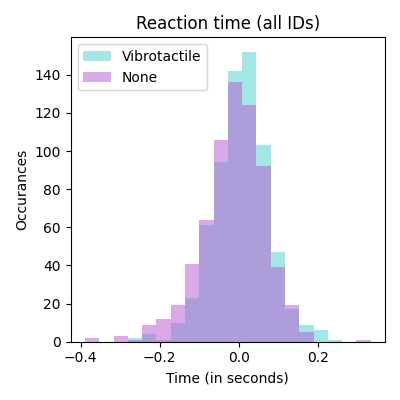

In [53]:
bins = np.histogram(np.hstack((threshold_distance_timestamp_haptics_nan, threshold_distance_timestamp_wo_nan)), bins=20)[1]

plt.figure(figsize=(4,4))
plt.hist(threshold_distance_timestamp_haptics, bins=bins, alpha=0.5, label='Vibrotactile', color='mediumturquoise')
plt.hist(threshold_distance_timestamp_wo, bins=bins, alpha=0.5, label='None', color='mediumorchid')
plt.title('Reaction time (all IDs)')
plt.xlabel('Time (in seconds)')
plt.ylabel('Occurances')
plt.legend()
plt.tight_layout()
plt.savefig('reactiontime_hist.png', dpi=500, bbox_inches="tight")
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

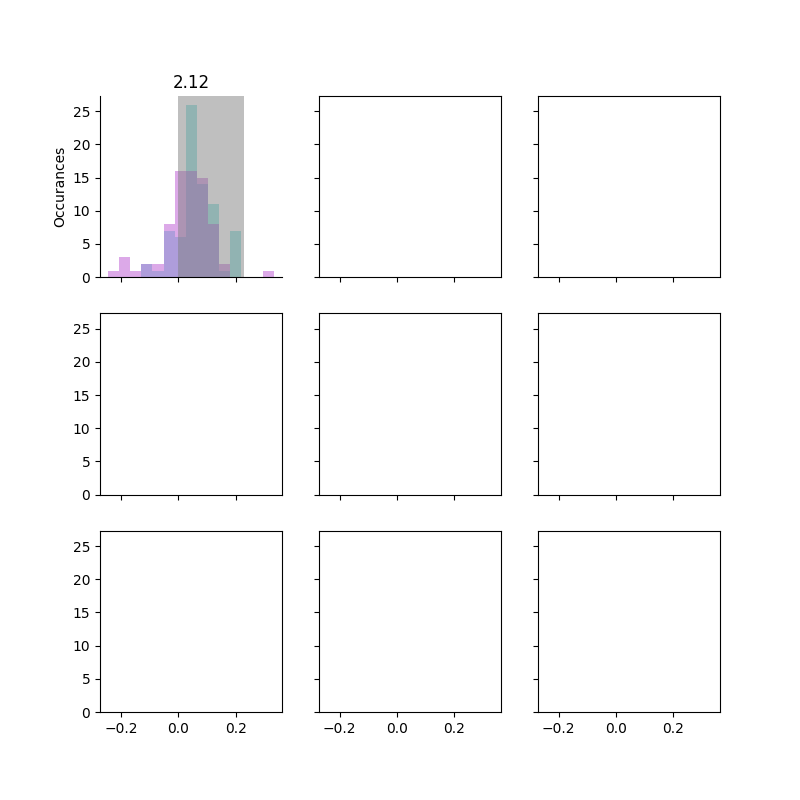

In [77]:
fig, ax = plt.subplots(3, 3, figsize=(8, 8), sharex=True, sharey=True)
ax = ax.flatten()
ID_ordered = np.sort(ID_haptics)
for idx, the_ID in enumerate(ID_ordered[::3]):

    # print(the_ID)
    idx_haptics = np.argwhere(the_ID == ID_haptics)
    idx_wo = np.argwhere(the_ID == ID_wo)
    target_size = gui_combos_haptics[idx_haptics[0][0],0]
    
    hist1 = threshold_distance_timestamp_haptics[idx_haptics[0][0]*gui_reps_haptics:(idx_haptics[0][0]+1)*gui_reps_haptics]
    hist2 = threshold_distance_timestamp_haptics[idx_haptics[2][0]*gui_reps_haptics:(idx_haptics[2][0]+1)*gui_reps_haptics]
    hist3 = threshold_distance_timestamp_haptics[idx_haptics[2][0]*gui_reps_haptics:(idx_haptics[2][0]+1)*gui_reps_haptics]
    
    similar_hists_haptics = np.concatenate((hist1, hist2, hist3))
    similar_hists_wo = np.concatenate((threshold_distance_timestamp_wo[idx_wo[0][0]*gui_reps_haptics:(idx_wo[0][0]+1)*gui_reps_haptics], threshold_distance_timestamp_wo[idx_wo[1][0]*gui_reps_haptics:(idx_wo[1][0]+1)*gui_reps_haptics], threshold_distance_timestamp_wo[idx_wo[2][0]*gui_reps_haptics:(idx_wo[2][0]+1)*gui_reps_haptics]))
    
    bins = np.histogram(np.hstack((similar_hists_haptics[~np.isnan(similar_hists_haptics)], similar_hists_wo[~np.isnan(similar_hists_wo)])), bins=15)[1]

    
    ax[idx].hist(similar_hists_haptics, bins=bins, alpha=0.5, label='Vibrotactile', color='mediumturquoise')
    ax[idx].hist(similar_hists_wo, bins=bins, alpha=0.5, label='None', color='mediumorchid')

    ax[idx].spines['top'].set_visible(False)
    ax[idx].spines['right'].set_visible(False)
    ax[idx].axvspan(0, target_size/1000, alpha=0.5, color='grey', label='Target', lw=0)
    ax[idx].set_title(round(the_ID, 2))
    if idx % 3 == 0:  
        ax[idx].set_ylabel('Occurances')

handles, labels = ax[8].get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
fig.legend(*zip(*unique), loc='upper right', bbox_to_anchor=(0.99, 0.99))

plt.suptitle('Reaction time')
fig.text(0.5, 0.0, 'Time (s)', ha='center', va='center')
plt.tight_layout()

plt.savefig('reaction_time_ID_jordyn.png', dpi=500, bbox_inches="tight")
plt.show()
    

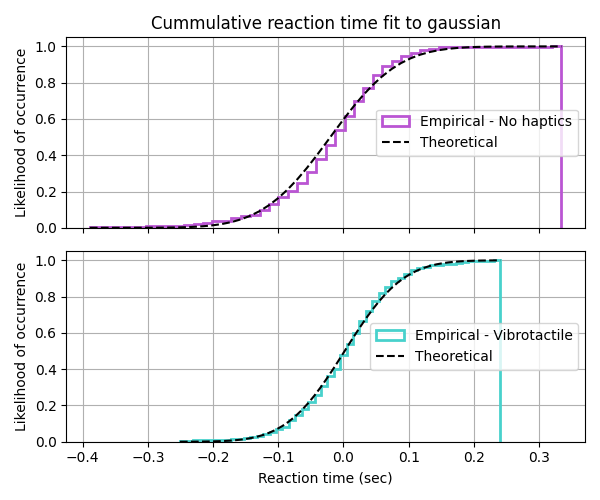

In [55]:
mu_wo = np.mean(threshold_distance_timestamp_wo_nan)
sigma_wo = np.std(threshold_distance_timestamp_wo_nan)
n_bins_wo = 50

fig, ax = plt.subplots(2, figsize=(6, 5), sharex=True, sharey=True)

# plot the cumulative histogram
n_wo, bins_wo, patches_wo = ax[0].hist(threshold_distance_timestamp_wo_nan, n_bins_wo, density=1, histtype='step',
                           cumulative=True, label='Empirical - No haptics', color='mediumorchid', linewidth=2)

# Add a line showing the expected distribution.
y = stats.norm.pdf(bins_wo, mu_wo, sigma_wo).cumsum()
y /= y[-1]

ax[0].plot(bins_wo, y, 'k--', linewidth=1.5, label='Theoretical')


ax[0].grid(True)
ax[0].legend(loc='right')
ax[0].set_title('Cummulative reaction time fit to gaussian')
ax[0].set_ylabel('Likelihood of occurrence')



## Haptics
mu_haptics = np.mean(threshold_distance_timestamp_haptics_nan)
sigma_haptics = np.std(threshold_distance_timestamp_haptics_nan)
n_bins_haptics = 50

# plot the cumulative histogram
n_haptics, bins_haptics, patches_haptics = ax[1].hist(threshold_distance_timestamp_haptics_nan, n_bins_haptics, density=1, histtype='step',
                           cumulative=True, label='Empirical - Vibrotactile', color='mediumturquoise', linewidth=2)

# Add a line showing the expected distribution.
y = stats.norm.pdf(bins_haptics, mu_haptics, sigma_haptics).cumsum()
y /= y[-1]

ax[1].plot(bins_haptics, y, 'k--', linewidth=1.5, label='Theoretical')


ax[1].grid(True)
ax[1].legend(loc='right')
ax[1].set_xlabel('Reaction time (sec)')
ax[1].set_ylabel('Likelihood of occurrence')

plt.tight_layout()

plt.show()

In [73]:
repitions = gui_reps_haptics
print("repitions:", repitions)
correct_timestamp_haptics = correct_timestamp_haptics[:-1]
level = np.arange(len(correct_timestamp_haptics))//repitions
# print('Levels:', level)




performance_haptics = np.bincount(level,correct_timestamp_haptics)/np.bincount(level)
print('performance per level:', performance_haptics)
np.savetxt('jordyn_haptics.txt', performance_haptics)
np.savetxt('jordyn_ID_haptics.txt', ID_haptics)

repitions: 25
performance per level: [0.36 0.24 0.16 0.56 0.68 0.68 0.56 0.56 0.4  0.92 0.84 0.68 0.4  0.32
 0.32 0.52 0.52 0.24 0.68 0.84 0.68 0.48 0.2  0.28 0.92 0.76 0.75]


In [76]:

repitions = gui_reps_wo
print("repitions:", repitions)
correct_timestamp_wo = correct_timestamp_wo[:-1]
level = np.arange(len(correct_timestamp_wo))//repitions
# print('Levels:', level)




performance_wo = np.bincount(level,correct_timestamp_wo)/np.bincount(level)
print('performance per level:', performance_wo)
np.savetxt('jordyn_wo.txt', performance_wo)
np.savetxt('jordyn_ID_wo.txt', ID_wo)
print(ID_wo)

repitions: 25
performance per level: [0.12       0.04       0.08       0.36       0.36       0.52
 0.12       0.36       0.52       0.76       0.84       0.56
 0.64       0.36       0.24       0.4        0.36       0.2
 0.88       0.52       0.4        0.36       0.32       0.36
 0.76       0.68       0.52631579]
[5.19639721 4.73696559 4.05889369 2.79836614 3.25779776 2.12029423
 3.87446912 3.4150375  2.73696559 2.12029423 2.79836614 3.25779776
 4.05889369 4.73696559 5.19639721 4.05889369 5.19639721 4.73696559
 2.73696559 3.87446912 3.4150375  4.73696559 5.19639721 4.05889369
 2.12029423 3.25779776 2.79836614]


0.7474874943908224
0.6955247573293968


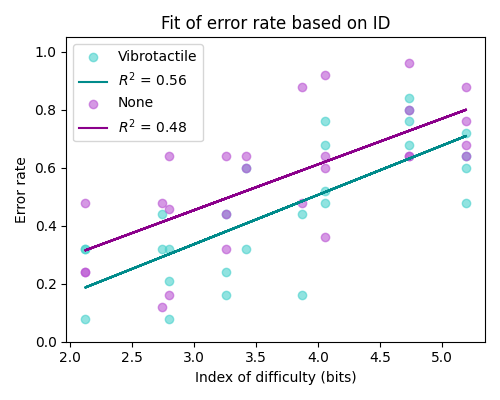

In [65]:
coef = np.polyfit(ID_haptics,1-performance_haptics,1)
ID_fit_haptics = np.poly1d(coef) 
r_value_haptics = stats.linregress(ID_haptics,1-performance_haptics)[2]
print(r_value_haptics)

coef = np.polyfit(ID_wo,1-performance_wo,1)
ID_fit_wo = np.poly1d(coef) 
r_value_wo = stats.linregress(ID_wo,1-performance_wo)[2]
print(r_value_wo)
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.figure(figsize=(5,4))
plt.scatter(ID_haptics, 1-performance_haptics, alpha=0.6, label='Vibrotactile', color='mediumturquoise')
label_str_haptics = r'$R^{}$ = {}'.format(2, round(r_value_haptics**2,2)) 
plt.plot(ID_haptics, ID_fit_haptics(ID_haptics), color='darkcyan', label=label_str_haptics) #'--k'=black dashed line, 'yo' = yellow circle marker

plt.scatter(ID_wo, 1-performance_wo, alpha=0.6, label='None', color='mediumorchid')
label_string_wo = r'$R^{}$ = {}'.format(2, round(r_value_wo**2,2)) 
plt.plot(ID_wo, ID_fit_wo(ID_wo), color='darkmagenta', label=label_string_wo) #'--k'=black dashed line, 'yo' = yellow circle marker

plt.title('Fit of error rate based on ID')
plt.xlabel('Index of difficulty (bits)')
plt.ylabel('Error rate')

plt.legend()
# plt.xlim([0, 4])
plt.ylim([0, 1.05])
plt.tight_layout()
plt.savefig('errorrate_ID_jordyn.png', dpi=500, bbox_inches="tight")
plt.show()

[-3.70370370e-06  4.65493827e-01]
-0.008084131289975541
[1.51851852e-04 3.25123457e-01]
0.33237444697069246


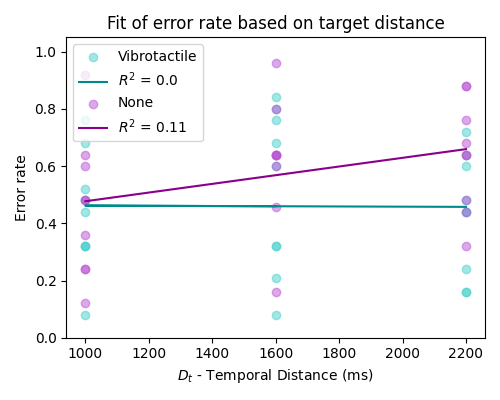

In [64]:

dt_coef_haptics = np.polyfit(gui_combos_haptics[:,1],1-performance_haptics,1)
print(dt_coef_haptics)
dt_fn_haptics = np.poly1d(dt_coef_haptics) 
r_value_haptics = stats.linregress(gui_combos_haptics[:,1],1-performance_haptics)[2]
print(r_value_haptics)


dt_coef_wo = np.polyfit(gui_combos_wo[:,1],1-performance_wo,1)
print(dt_coef_wo)
dt_fn_wo = np.poly1d(dt_coef_wo) 
r_value_wo = stats.linregress(gui_combos_wo[:,1],1-performance_wo)[2]
print(r_value_wo) 

plt.figure(figsize=(5,4))
plt.scatter(gui_combos_haptics[:,1], 1-performance_haptics[0:np.shape(ID_haptics)[0]], alpha=0.5, label="Vibrotactile", color='mediumturquoise')
label_str_haptics = r'$R^{}$ = {}'.format(2, round(r_value_haptics**2,2)) 
plt.plot(gui_combos_haptics[:, 1][0:3], dt_fn_haptics(gui_combos_haptics[:, 1][0:3]), color='darkcyan', label=label_str_haptics)


plt.scatter(gui_combos_wo[:,1], 1-performance_wo[0:np.shape(ID_wo)[0]], alpha=0.5,  label="None", color='mediumorchid')
label_string_wo = r'$R^{}$ = {}'.format(2, round(r_value_wo**2,2)) 
plt.plot(gui_combos_wo[:, 1][0:3], dt_fn_wo(gui_combos_wo[:, 1][0:3]),color='darkmagenta', label=label_string_wo)


plt.title('Fit of error rate based on target distance')
plt.xlabel('$D_{t}$ - Temporal Distance (ms)')
plt.ylabel('Error rate')
plt.ylim([0, 1.05])
plt.legend()
plt.tight_layout()
plt.savefig('errorrate_distance_jordyn.png', dpi=500, bbox_inches="tight")
plt.show()

[-0.00181881  0.81665778]
-0.6056952178275786
[-0.00251659  0.80350222]
-0.8357341768572292


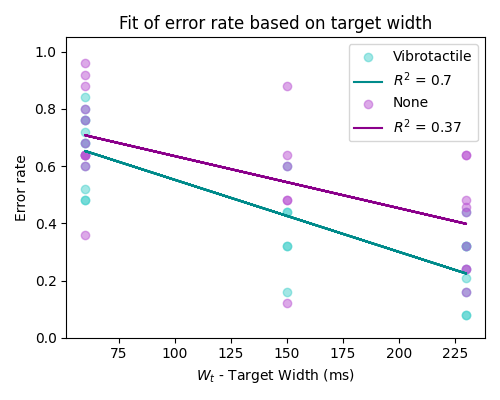

In [63]:
wt_coef_wo = np.polyfit(gui_combos_wo[:,0],1-performance_wo,1)
print(wt_coef_wo)
wt_wo = np.poly1d(wt_coef_wo)
r_value_wo = stats.linregress(gui_combos_wo[:,0],1-performance_wo)[2]
print(r_value_wo) 

wt_coef_haptics = np.polyfit(gui_combos_haptics[:,0],1-performance_haptics,1)
print(wt_coef_haptics)
wt_haptics = np.poly1d(wt_coef_haptics) 
r_value_haptics = stats.linregress(gui_combos_haptics[:,0],1-performance_haptics)[2]
print(r_value_haptics)

plt.figure(figsize=(5,4))
plt.scatter(gui_combos_haptics[:,0], 1-performance_haptics[0:np.shape(ID_haptics)[0]], alpha=0.5, color='mediumturquoise', label='Vibrotactile')
label_str_haptics = r'$R^{}$ = {}'.format(2, round(r_value_haptics**2,2)) 
plt.plot(gui_combos_haptics[:, 0][0:-1:3], wt_haptics(gui_combos_haptics[:, 0][0:-1:3]), color='darkcyan', label=label_str_haptics)

plt.scatter(gui_combos_wo[:,0], 1-performance_wo[0:np.shape(ID_wo)[0]], alpha=0.5,  label='None', color='mediumorchid')
label_string_wo = r'$R^{}$ = {}'.format(2, round(r_value_wo**2,2)) 
plt.plot(gui_combos_wo[:, 0][0:-1:3], wt_wo(gui_combos_wo[:, 0][0:-1:3]),color='darkmagenta', label=label_string_wo)

plt.title('Fit of error rate based on target width')
plt.xlabel('$W_{t}$ - Target Width (ms)')
plt.ylabel('Error rate')
plt.ylim([0, 1.05])
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('errorrate_width_Jordyn.png', dpi=500, bbox_inches="tight")

In [60]:
np.shape(box_plot_data_wo)

(27, 25)

In [58]:
threshold_distance_timestamp_wo =threshold_distance_timestamp_wo[:-1]

In [65]:
ID_wo

array([3.4150375 , 2.73696559, 3.87446912, 3.25779776, 2.12029423,
       2.79836614, 4.05889369, 4.73696559, 5.19639721, 2.73696559,
       3.87446912, 3.4150375 , 2.79836614, 2.12029423, 3.25779776,
       4.05889369, 5.19639721, 4.73696559, 3.4150375 , 2.73696559,
       3.87446912, 2.12029423, 2.79836614, 3.25779776, 5.19639721,
       4.73696559, 4.05889369])

In [69]:
ID_wo_rep = np.repeat(ID_wo, 25)
print(ID_wo_rep)

[3.4150375  3.4150375  3.4150375  3.4150375  3.4150375  3.4150375
 3.4150375  3.4150375  3.4150375  3.4150375  3.4150375  3.4150375
 3.4150375  3.4150375  3.4150375  3.4150375  3.4150375  3.4150375
 3.4150375  3.4150375  3.4150375  3.4150375  3.4150375  3.4150375
 3.4150375  2.73696559 2.73696559 2.73696559 2.73696559 2.73696559
 2.73696559 2.73696559 2.73696559 2.73696559 2.73696559 2.73696559
 2.73696559 2.73696559 2.73696559 2.73696559 2.73696559 2.73696559
 2.73696559 2.73696559 2.73696559 2.73696559 2.73696559 2.73696559
 2.73696559 2.73696559 3.87446912 3.87446912 3.87446912 3.87446912
 3.87446912 3.87446912 3.87446912 3.87446912 3.87446912 3.87446912
 3.87446912 3.87446912 3.87446912 3.87446912 3.87446912 3.87446912
 3.87446912 3.87446912 3.87446912 3.87446912 3.87446912 3.87446912
 3.87446912 3.87446912 3.87446912 3.25779776 3.25779776 3.25779776
 3.25779776 3.25779776 3.25779776 3.25779776 3.25779776 3.25779776
 3.25779776 3.25779776 3.25779776 3.25779776 3.25779776 3.25779776

In [70]:
np.unique(ID_wo_rep, return_index=True)[1][1:]

array([ 25, 125,  75,   0,  50, 150, 175, 200], dtype=int64)

In [61]:
np.unique(level, return_index=True)[1][1:]

array([ 25,  50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325,
       350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625, 650],
      dtype=int64)

In [74]:
np.shape(box_plot_data_haptics)

C:\Users\Nikole Chetty\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(9,)

Vibro mean: [ 0.00474625  0.01214562  0.00243051  0.08367123  0.08286241  0.06798036
  0.01439474 -0.02402893 -0.01974889  0.0519533   0.04794499  0.0210232
  0.07695973  0.07922123  0.06706287  0.01791021 -0.01800764 -0.02632468
  0.02953912  0.02350181  0.0060246   0.0693896   0.07080878  0.06181564
 -0.00690449 -0.0332003  -0.01095148]
Vibro std: [0.06460334 0.06593419 0.08790187 0.0654699  0.05256029 0.04243693
 0.04725502 0.03605035 0.04557764 0.03958808 0.03998503 0.05544789
 0.10157982 0.08119569 0.03457563 0.04545981 0.04678577 0.03434057
 0.03351057 0.03988636 0.04969809 0.05507558 0.04237359 0.04492781
 0.04690406 0.04304144 0.05948763]
None mean: [ 0.00851891  0.00542584  0.03144097  0.03006084  0.0456109   0.03111169
  0.00547853 -0.01354728 -0.00092909  0.00596215 -0.00127146  0.03798314
  0.05602661  0.07925268  0.02692896  0.0206978  -0.01871304 -0.0128016
  0.02805775  0.01612599  0.01141162  0.06007165  0.04655461  0.04159874
  0.04012006  0.0331595   0.00762714]
None 

C:\Users\Nikole Chetty\AppData\Local\Temp\ipykernel_12620\1057162194.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,3))


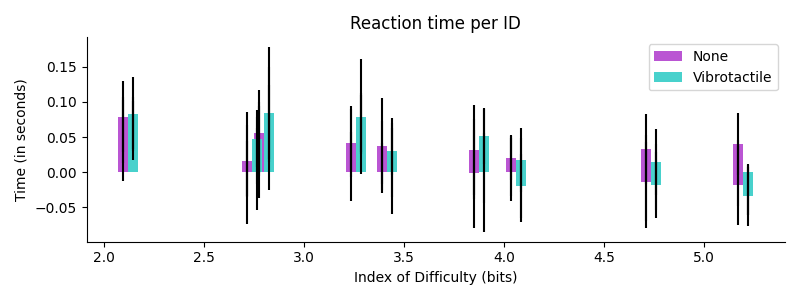

In [76]:
box_plot_data_haptics = np.split(threshold_distance_timestamp_haptics, np.unique(level, return_index=True)[1][1:])
bar_mean_haptics = np.nanmean(box_plot_data_haptics, axis=1)
print('Vibro mean:', bar_mean_haptics)
bar_std_haptics = np.nanstd(box_plot_data_haptics, axis=1)
print('Vibro std:', bar_std_haptics)

box_plot_data_wo = np.split(threshold_distance_timestamp_wo, np.unique(level, return_index=True)[1][1:])
bar_mean_wo = np.nanmean(box_plot_data_wo, axis=1)
print('None mean:', bar_mean_wo)
bar_std_wo = np.nanstd(box_plot_data_wo, axis=1)
print('None std:', bar_std_wo)

plt.figure(figsize=(8,3))
ax = plt.subplot(111)
w = 0.05
x= np.arange(np.shape(bar_mean_wo)[0])
ax.bar(ID_wo-w/2, bar_mean_wo, yerr=bar_std_wo, width=w, color='mediumorchid', align='center', label='None')
ax.bar(ID_haptics+w/2, bar_mean_haptics,yerr=bar_std_haptics, width=w, color='mediumturquoise', align='center', label='Vibrotactile')
plt.legend()
plt.title('Reaction time per ID')
plt.ylabel('Time (in seconds)')
plt.xlabel('Index of Difficulty (bits)')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.tight_layout()
plt.savefig('reactiontime_ID_jordyn.png', dpi=500, bbox_inches="tight")
plt.show()